In [1]:
import seaborn as sns

C:\Users\best\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
print(sns.get_dataset_names())

C:\Users\best\Anaconda3\lib\site-packages\seaborn\utils.py:376: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 376 of the file C:\Users\best\Anaconda3\lib\site-packages\seaborn\utils.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  gh_list = BeautifulSoup(http)


['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'tips', 'titanic']


In [3]:
data=sns.load_dataset('iris')

In [4]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
import dtale

In [6]:
dtale.show(data)

2020-11-03 17:06:07,616 - INFO     - NumExpr defaulting to 4 threads.


#### removing duplicate row

In [7]:
data=data.drop(142,axis=0)

In [8]:
len(data)

149

In [ ]:
dtale.show(data)

In [ ]:
list(data.columns)

#### based on correlation matrix removing petal_length

In [9]:
data=data.drop('sepal_length',axis=1)

In [10]:
list(data.columns)

['sepal_width', 'petal_length', 'petal_width', 'species']

In [11]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['species']=labelencoder.fit_transform(data['species'])

In [ ]:
data.head()

#### checking outlier data

In [ ]:
index=data[(data['sepal_width']<2.05)|(data['sepal_width']>4.05)].index
index

In [ ]:
a=data.iloc[60]
a.head()

index = data[(data['sepal_width']<2.05)|(data['sepal_width']>4.05)].index
data.drop(index, inplace=True)
data['sepal_width'].describe()

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test=train_test_split(data.drop('species',axis=1),data['species'],test_size=0.30,random_state=101)

### LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel= LogisticRegression()
logmodel.fit(x_train,y_train)

In [ ]:
predictions=logmodel.predict(x_test)#97

### DecisionTree

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
Dt=DecisionTreeClassifier()
Dt.fit(x_train,y_train)

In [ ]:
predictions=Dt.predict(x_test)     #95

## KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train,y_train)

In [ ]:
predictions=neigh.predict(x_test)

### XGBoost

In [14]:
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=1,learning_rate=0.01)
xg.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=1, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [15]:
predictions=xg.predict(x_test)

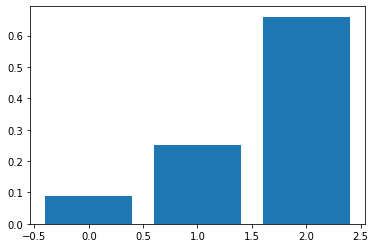

In [16]:
#print(model.feature_importances_)
# plot
from matplotlib import pyplot
pyplot.bar(range(len(xg.feature_importances_)), xg.feature_importances_)
pyplot.show()

from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [17]:
from sklearn.metrics import confusion_matrix

In [18]:
accuracy=confusion_matrix(y_test,predictions)

In [19]:
accuracy

array([[14,  0,  0],
       [ 0, 19,  0],
       [ 0,  0, 12]], dtype=int64)

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
accuracy=accuracy_score(y_test,predictions)
accuracy

1.0

In [22]:
predictions

array([0, 1, 2, 1, 0, 1, 1, 2, 1, 0, 1, 1, 0, 2, 1, 2, 2, 2, 1, 0, 1, 0,
       1, 0, 0, 0, 2, 1, 2, 2, 2, 1, 1, 1, 0, 1, 2, 0, 0, 0, 1, 1, 0, 2,
       1])

Executing shutdown due to inactivity...


2020-11-03 18:06:22,988 - INFO     - Executing shutdown due to inactivity...


Executing shutdown...


2020-11-03 18:06:35,035 - INFO     - Executing shutdown...
